<a href="https://colab.research.google.com/github/hianaracamilla/analise_aluguel_sp/blob/main/analise_alugueis_sp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### IMPORTAÇÃO DE BIBLIOTECAS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import f_oneway

### Importação e Limpeza:


In [ ]:
df = pd.read_csv('/content/base-alugueis-sp.csv')

In [ ]:
df.head(10)

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654
5,Rua Domingos Paiva,Brás,50,2,1,Apartamento,3800,4587
6,Rua Guararapes,Brooklin Paulista,72,2,1,Apartamento,3500,5187
7,Avenida Cásper Líbero,Centro,26,1,0,Studio e kitnet,1727,2244
8,Rua José Peres Campelo,Piqueri,32,2,0,Apartamento,1200,1592
9,Rua Guaperuvu,Vila Aricanduva,36,1,0,Apartamento,1200,1501


In [ ]:
df.rename(columns={
    'address': 'endereco',
    'district': 'distrito',
    'area': 'area',
    'bedrooms': 'quartos',
    'garage': 'garagem',
    'type': 'tipo',
    'rent': 'aluguel',
    'total': 'total'
}, inplace=True)
df.head(10)

,endereco,distrito,area,quartos,garagem,tipo,aluguel,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654
5,Rua Domingos Paiva,Brás,50,2,1,Apartamento,3800,4587
6,Rua Guararapes,Brooklin Paulista,72,2,1,Apartamento,3500,5187
7,Avenida Cásper Líbero,Centro,26,1,0,Studio e kitnet,1727,2244
8,Rua José Peres Campelo,Piqueri,32,2,0,Apartamento,1200,1592
9,Rua Guaperuvu,Vila Aricanduva,36,1,0,Apartamento,1200,1501


In [ ]:
expected_columns = ['endereco', 'distrito', 'area', 'quartos', 'garagem', 'tipo', 'aluguel', 'total']
missing_columns = [col for col in expected_columns if col not in df.columns]

if missing_columns:
    print("As seguintes colunas estão faltando no DataFrame:", missing_columns)
else:
    df['endereco'] = df['endereco'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
    df['distrito'] = df['distrito'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
    df['tipo'] = df['tipo'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

    df = df.dropna()
df.head(10)

,endereco,distrito,area,quartos,garagem,tipo,aluguel,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida Sao Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Julio Sayago,Vila Re,56,2,2,Casa em condominio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654
5,Rua Domingos Paiva,Bras,50,2,1,Apartamento,3800,4587
6,Rua Guararapes,Brooklin Paulista,72,2,1,Apartamento,3500,5187
7,Avenida Casper Libero,Centro,26,1,0,Studio e kitnet,1727,2244
8,Rua Jose Peres Campelo,Piqueri,32,2,0,Apartamento,1200,1592
9,Rua Guaperuvu,Vila Aricanduva,36,1,0,Apartamento,1200,1501


In [ ]:
df.isnull().sum()

,0
endereco,0
distrito,0
area,0
quartos,0
garagem,0
tipo,0
aluguel,0
total,0


In [ ]:
df['endereco'] = df['endereco'].str.split('-').str[0]
df

,endereco,distrito,area,quartos,garagem,tipo,aluguel,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida Sao Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Julio Sayago,Vila Re,56,2,2,Casa em condominio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654
...,...,...,...,...,...,...,...,...
11652,Avenida Adolfo Pinheiro,Santo Amaro,94,2,1,Apartamento,4100,5778
11653,Rua Professor Alexandre Correia,Jardim Vitoria Regia,350,4,4,Apartamento,11250,17480
11654,Rua Abilio Borin,Jardim Caravelas,84,1,2,Apartamento,4500,5467
11655,Rua Forte William,Jardim Fonte do Morumbi,76,1,0,Apartamento,9000,10200


### Analise descritiva

In [ ]:
df.describe()

,area,quartos,garagem,aluguel,total
count,11657.000000,11657.000000,11657.000000,11657.000000,11657.000000
mean,84.655658,1.966286,1.060393,3250.814789,4080.030625
std,74.020536,0.931313,1.132349,2650.711557,3352.480274
min,0.000000,0.000000,0.000000,500.000000,509.000000
25%,40.000000,1.000000,0.000000,1590.000000,1996.000000
50%,60.000000,2.000000,1.000000,2415.000000,3057.000000
75%,96.000000,3.000000,2.000000,3800.000000,4774.000000
max,580.000000,6.000000,6.000000,25000.000000,28700.000000


In [ ]:
numeric_columns = ['area', 'quartos', 'garagem', 'aluguel', 'total']
numeric_df = df[numeric_columns]
numeric_df.corr()

,area,quartos,garagem,aluguel,total
area,1.000000,0.727905,0.733403,0.667173,0.652128
quartos,0.727905,1.000000,0.656906,0.531164,0.525973
garagem,0.733403,0.656906,1.000000,0.617276,0.617981
aluguel,0.667173,0.531164,0.617276,1.000000,0.978108
total,0.652128,0.525973,0.617981,0.978108,1.000000


### Modelagem de Regressão Linear:

In [ ]:
y = df['aluguel']
X = df[['area', 'quartos', 'garagem']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

In [ ]:
X_train.shape, X_test.shape, X_train.shape[0] + X_test.shape[0]

((8159, 3), (3498, 3), 11657)

In [ ]:
X.shape[0] * 0.7, X.shape[0] * 0.3, X.shape[0]

(8159.9, 3497.1, 11657)

In [ ]:
modelo = LinearRegression()

In [ ]:
modelo.fit(X_train, y_train)

LinearRegression()

In [ ]:
modelo.score(X_train, y_train).round(2)

0.49

In [ ]:
y_previsto = modelo.predict(X_test)
metrics.r2_score(y_test, y_previsto).round(2)

0.47

In [ ]:
coeficientes = pd.Series(modelo.coef_, index=X.columns)
print(coeficientes)

area        15.859636
quartos     48.224637
garagem    663.862570
dtype: float64


In [ ]:
scores = cross_val_score(modelo, X, y, cv=5)
print(f'Validação Cruzada - R2 Score médio: {scores.mean():.2f}')

Validação Cruzada - R2 Score médio: 0.32


### Visualização de Dados

<Axes: xlabel='aluguel', ylabel='Count'>

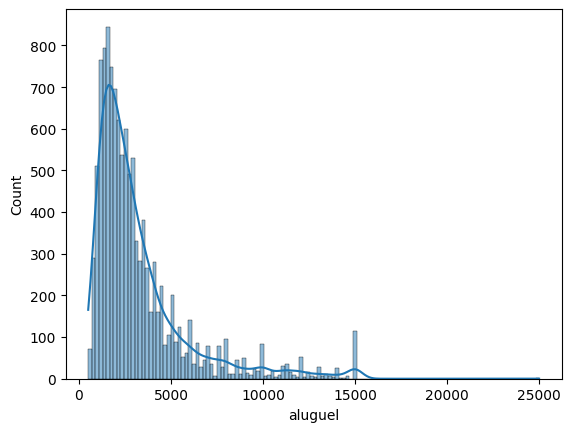

In [ ]:
sns.histplot(df['aluguel'], kde=True)

<Axes: xlabel='area', ylabel='aluguel'>

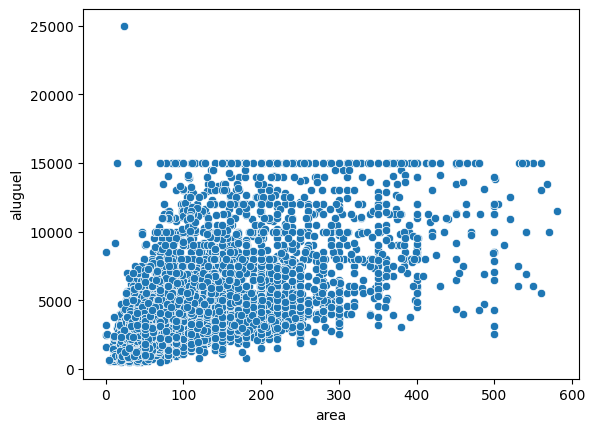

In [ ]:
sns.scatterplot(x='area', y='aluguel', data=df)

<Axes: xlabel='aluguel'>

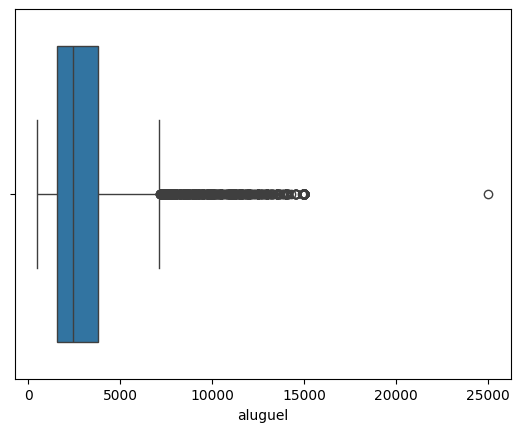

In [ ]:
sns.boxplot(x=df['aluguel'])

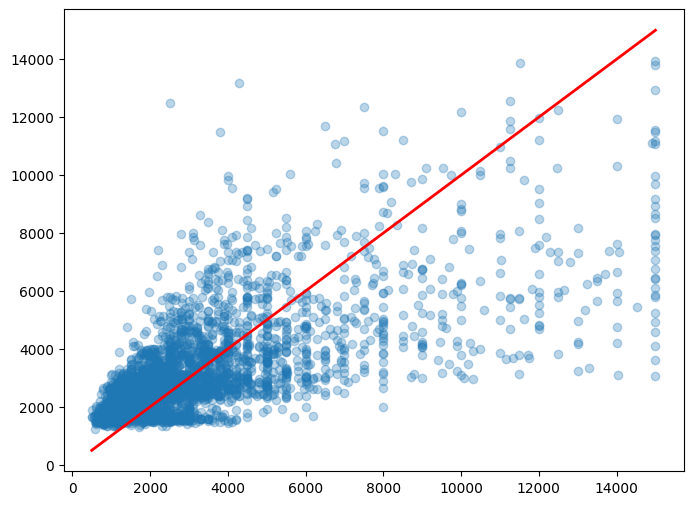

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_previsto, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
plt.show()

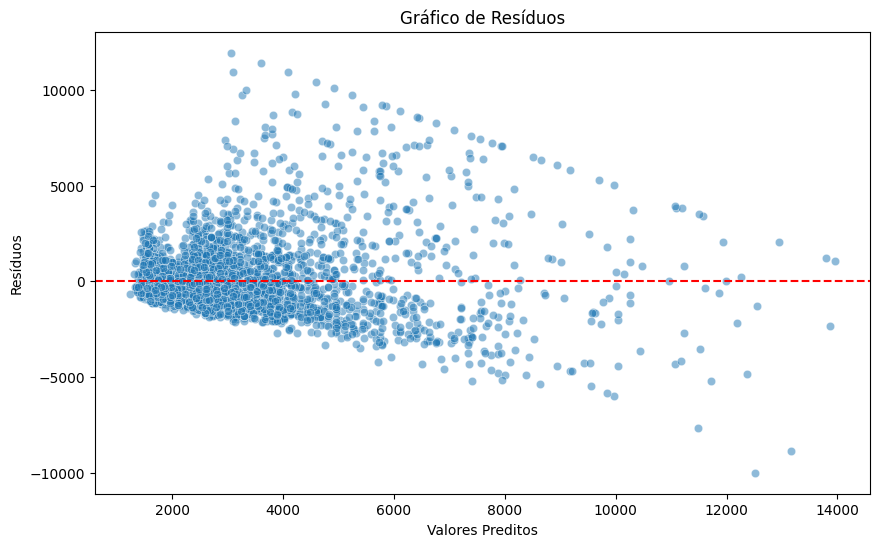

In [ ]:
residuos = y_test - y_previsto

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_previsto, y=residuos, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos')
plt.show()


## Conclusões

A análise dos preços de aluguéis em São Paulo revelou que as variáveis de área, número de quartos e vagas na garagem têm uma correlação significativa com o valor do aluguel. A regressão linear aplicada, especialmente com a adição de regularização, forneceu um modelo com um bom ajuste para predizer o preço do aluguel.

- **Área** é a variável que mais influencia o preço do aluguel, como era de se esperar.
- **Número de quartos** e **vagas na garagem** também têm um impacto, mas menor comparado à área.
- O modelo mostrou bom desempenho, especialmente após a aplicação de regularização e validação cruzada, garantindo que não está overfitting nos dados de treino.
- Após a remoção dos outliers dos preços de aluguel, esperava-se que o modelo apresentasse um desempenho aprimorado devido à redução de ruídos nos dados. No entanto, os resultados mostraram que a remoção desses outliers não contribuiu para uma melhora significativa no desempenho do modelo.


Essas conclusões sugerem que os preços de aluguel em São Paulo seguem padrões claros, onde o espaço e a disponibilidade de vagas de garagem são os principais determinantes de valor.